<a href="https://colab.research.google.com/github/agusrdlv/diplodatos-G6/blob/master/AyCD_ej1_Formatos_de_Datos_CSV_JSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = ".."

In [3]:
tabla_1 = pd.read_csv(BASE_DIR + "/input/wtageinf.csv")
tabla_1.head(10)

Sex  Agemos         L         M  ...       P75        P90        P95        P97
0    1     0.0  1.815151  3.530203  ...  3.879077   4.172493   4.340293   4.446488
1    1     0.5  1.547523  4.003106  ...  4.387423   4.718161   4.910130   5.032625
2    1     1.5  1.068796  4.879525  ...  5.327328   5.728153   5.967102   6.121929
3    1     2.5  0.695974  5.672889  ...  6.175598   6.638979   6.921119   7.106250
4    1     3.5  0.419815  6.391392  ...  6.942217   7.460702   7.781401   7.993878
5    1     4.5  0.219867  7.041836  ...  7.635323   8.202193   8.556813   8.793444
6    1     5.5  0.077506  7.630425  ...  8.262033   8.871384   9.255615   9.513307
7    1     6.5 -0.021908  8.162951  ...  8.828786   9.475466   9.885436  10.161350
8    1     7.5 -0.089441  8.644832  ...  9.341490  10.021014  10.453314  10.744924
9    1     8.5 -0.133409  9.081120  ...  9.805593  10.514064  10.965736  11.270838

[10 rows x 14 columns]

In [4]:
tabla_1.dtypes

Sex         int64
Agemos    float64
L         float64
M         float64
S         float64
P3        float64
P5        float64
P10       float64
P25       float64
P50       float64
P75       float64
P90       float64
P95       float64
P97       float64
dtype: object

In [5]:
tabla_1.columns

Index(['Sex', 'Agemos', 'L', 'M', 'S', 'P3', 'P5', 'P10', 'P25', 'P50', 'P75',
       'P90', 'P95', 'P97'],
      dtype='object')

In [6]:
filtrado= tabla_1[tabla_1.Sex==1]
filtrado.plot(x='Agemos', y='P3');

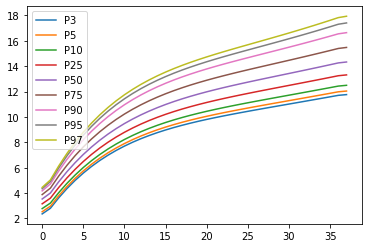

In [7]:
columns= ['P3','P5',	'P10',	'P25',	'P50',	'P75',	'P90',	'P95',	'P97']
tabla_1[tabla_1.Sex == 1][columns].plot()

In [8]:
tabla_1[tabla_1.Sex == 2][columns].plot()

In [9]:
tabla_2 = pd.read_json(BASE_DIR + "/input/pasos.json", orient='records', dtype='dict')
tabla_2

province  ...                             name
0    Tierra del Fuego  ...       SAN SEBASTIAN  ( USHUAIA )
1    Tierra del Fuego  ...          AERO PUBLICO DE USHUAIA
2    Tierra del Fuego  ...      PUERTO USHUAIA (PREFECTURA)
3    Tierra del Fuego  ...                   PUERTO USHUAIA
4          Santa Cruz  ...        PASO LAURITA CASAS VIEJAS
..                ...  ...                              ...
247            Chubut  ...                  PASO PAMPA ALTA
248        Santa Cruz  ...  PASO PORTEZUELO DE LA DIVISORIA
249      Buenos Aires  ...                      ROU COLONIA
250      Buenos Aires  ...                      ROU COLONIA
251          Misiones  ...    ZONA FRANCA IGUAZU (TRANSITO)

[252 rows x 3 columns]

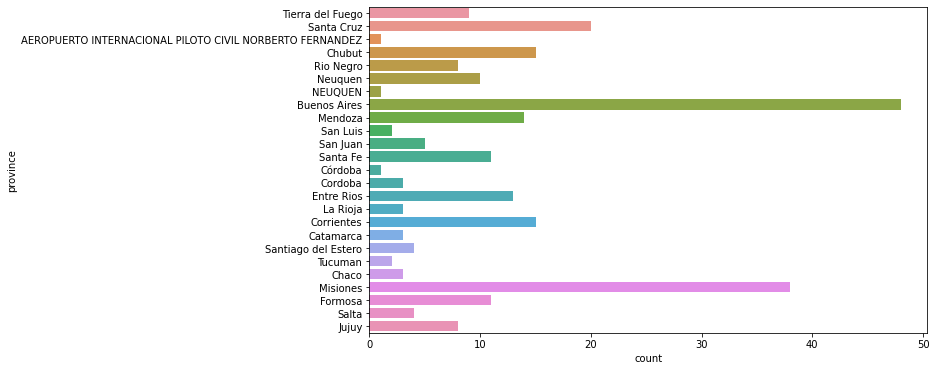

In [10]:
plt.figure(figsize=(10,6))
sn.countplot(data=tabla_2, y='province')

In [18]:
tabla_2.province = tabla_2.province.str.lower()

In [19]:
plt.figure(figsize=(10,6))
sn.countplot(data=tabla_2, y='province')

In [24]:

!pip install unidecode

     |████████████████████████████████| 245kB 8.0MB/s 


In [27]:
import unidecode

In [29]:
tabla_2['province'] = tabla_2['province'].apply(unidecode.unidecode)

In [31]:
plt.figure(figsize=(10,6))
sn.countplot(data=tabla_2, y='province')

In [33]:
tabla_2.province.unique()

array(['tierra del fuego', 'santa cruz',
       'aeropuerto internacional piloto civil norberto fernandez',
       'chubut', 'rio negro', 'neuquen', 'buenos aires', 'mendoza',
       'san luis', 'san juan', 'santa fe', 'cordoba', 'entre rios',
       'la rioja', 'corrientes', 'catamarca', 'santiago del estero',
       'tucuman', 'chaco', 'misiones', 'formosa', 'salta', 'jujuy'],
      dtype=object)